In [1]:
import numpy as np
import tensorly as tl
from umap import UMAP
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.decomposition import TruncatedSVD
from tensorly.decomposition import tucker, parafac, non_negative_tucker

In [2]:
raw = np.load("tenx.npy")

In [3]:
raw.shape

(23, 1000, 1999)

# 2D case

In [49]:
core, factors = tucker(raw.reshape(23000, 1999), rank=[1000, 2])

In [50]:
core.shape, [a.shape for a in factors]

((1000, 2), [(23000, 1000), (1999, 2)])

In [51]:
(factors[0]@core).shape

(23000, 2)

In [52]:
PCT = factors[0]@core

In [53]:
colors = sum([[a]*1000 for a in np.arange(23)], [])

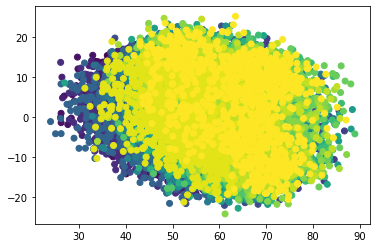

In [54]:
plt.scatter(PCT.T[0], PCT.T[1], c=colors)

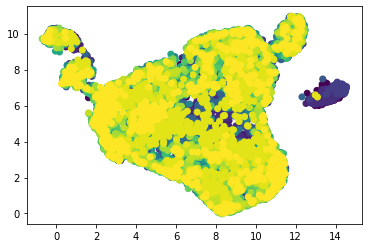

In [60]:
plt.scatter(tenx_umap.T[0], tenx_umap.T[1], c=colors)

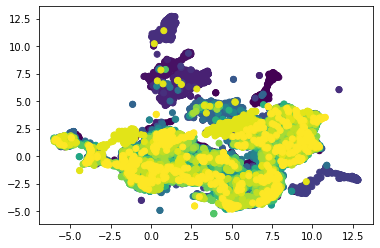

In [63]:
plt.scatter(tenx_umap.T[0], tenx_umap.T[1], c=colors)

In [24]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

In [10]:
d_orig = pdist(raw.reshape(23000, 1999))

In [11]:
d_tucker = pdist(PCT)

In [10]:
tenx_50_tsvd = TruncatedSVD(n_components=50).fit_transform(raw.reshape(23000, 1999))
u = UMAP()
tenx_umap = u.fit_transform(tenx_50_tsvd)

In [31]:
tenx_2_tsvd = TruncatedSVD(n_components=2).fit_transform(raw.reshape(23000, 1999))

In [64]:
d_umap = pdist(tenx_umap)

In [32]:
d_tsvd = pdist(tenx_2_tsvd)

In [12]:
st.pearsonr(d_orig, d_tucker)

(0.5123709789054958, 0.0)

In [ ]:
st.pearsonr(d_orig, d_umap)

In [33]:
st.pearsonr(d_orig, d_tsvd)

(0.5123647936456625, 0.0)

In [19]:
st.pearsonr(d_tucker, d_umap)

(0.3135592090117001, 0.0)

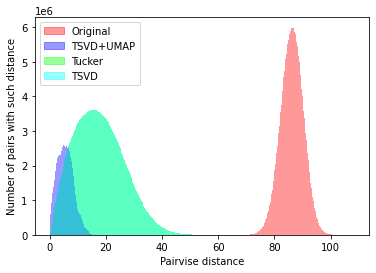

In [34]:
plt.hist(d_orig, color=(1,0,0,0.4), bins=200)
plt.hist(d_tucker, color=(0,1,0,0.4), bins=200)
plt.hist(d_umap, color=(0,0,1,0.4), bins=200)
plt.hist(d_tsvd, color=(0,1,1,0.4), bins=200)
plt.legend(
    loc="best", handles=[
        Patch(label="Original", color=(1,0,0,0.4)),
        Patch(label="TSVD+UMAP", color=(0,0,1,0.4)),
        Patch(label="Tucker", color=(0,1,0,0.4)),
        Patch(label="TSVD", color=(0,1,1,0.4)),
    ]
)
plt.xlabel("Pairvise distance")
plt.ylabel("Number of pairs with such distance")
plt.savefig("OrigVsTucker.png")
plt.show()

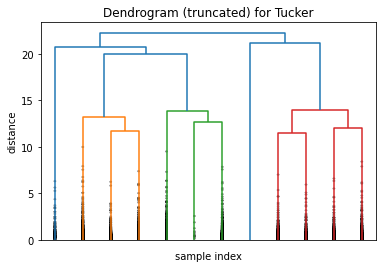

In [28]:
ln_tucker = linkage(d_tucker, "average")
plt.title('Dendrogram (truncated) for Tucker')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    ln_tucker,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.savefig("TuckerDendrogram.png")
plt.show()

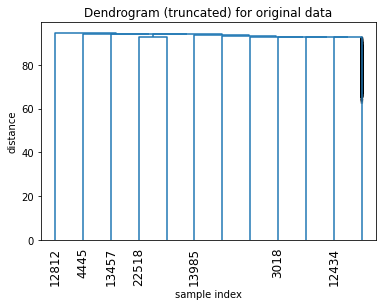

In [29]:
ln_orig = linkage(d_orig, "average")
plt.title('Dendrogram (truncated) for original data')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    ln_orig,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

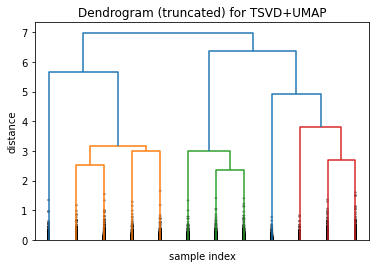

In [30]:
ln_umap = linkage(d_umap, "average")
plt.title('Dendrogram (truncated) for TSVD+UMAP')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    ln_umap,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

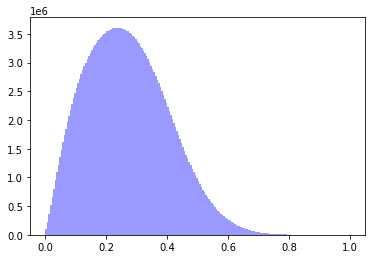

In [36]:
plt.hist(d_parafac, color=(0,0,1,0.4), bins=200)
plt.show()

# 3D case

In [22]:
raw.shape

(23, 1000, 1999)

In [34]:
d_orig_3d.shape

(23, 23)

In [35]:
def triu_dists(d):
    triui = np.triu_indices(d.shape[0])    
    return(d[triui])

In [36]:
d_orig_3d = np.zeros((23, 23))
for a in np.arange(23):
    for b in np.arange(23):
        d_orig_3d[a,b] = tl.norm(raw[a,:,:]-raw[b,:,:])
d_orig_3d_flat = triu_dists(d_orig_3d)
d_orig_3d_flat = d_orig_3d_flat[d_orig_3d_flat>0]

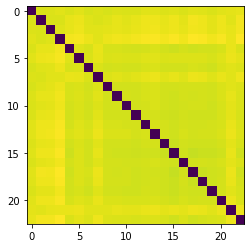

In [37]:
plt.imshow(d_orig_3d)

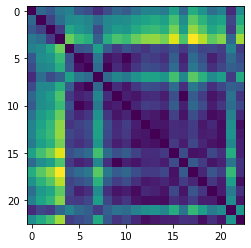

In [47]:
plt.imshow(squareform(d_tucker_3d))

In [39]:
d_orig_3d_flat.shape

(253,)

In [4]:
core_3d, factors_3d = tucker(raw, rank=[23, 1, 2])

In [5]:
core_3d.shape, [a.shape for a in factors_3d]

((23, 1, 2), [(23, 23), (1000, 1), (1999, 2)])

In [6]:
PCT_3d = (core_3d.squeeze().T @ factors_3d[0]).T

In [7]:
PCT_3d.shape

(23, 2)

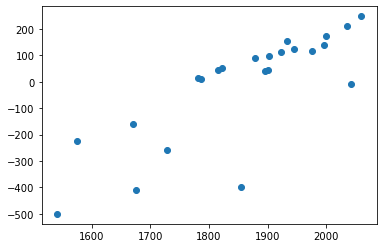

In [8]:
plt.scatter(PCT_3d.T[0], PCT_3d.T[1])

In [40]:
d_tucker_3d = pdist(PCT_3d)

In [43]:
st.pearsonr(d_tucker_3d, d_orig_3d_flat)

(0.8716274012533722, 1.0904616826989938e-79)

In [19]:
umap_means = []
for a in np.arange(23):
    umap_means.append(np.mean(tenx_umap[1000*a:1000*(a+1)], 0))
umap_means = np.stack(umap_means)

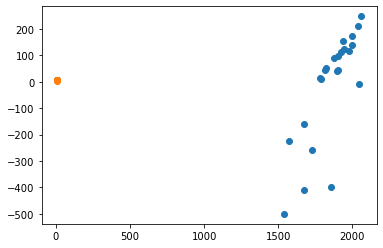

In [20]:
plt.scatter(PCT_3d.T[0], PCT_3d.T[1])
plt.scatter(umap_means.T[0], umap_means.T[1])